# Question 1

In [2]:
#imports

import numpy as np
import matplotlib.pyplot as plt
from iterate import iterate

In [3]:
%%time

#setting the number of iterations and the number of points along each axis on the image.

N = 50
points = 400

x = np.linspace(-2, 2, points)
y = np.linspace(-2, 2, points)

# Generate 2D mesh of coordinates
X, Y = np.meshgrid(x, y)

# Initializing two empty images, one for each task.
U = np.zeros((len(x), len(y)))

U2 = U.copy()

#Populating the first array with the square modulus values of each point 
# after the iterate function has been applied and populating
#the second array with the characteristic "divergence number" for each point.

for i in range(len(x)):
    for j in range(len(y)):
        U[i,j] = iterate(x[i],y[j], N)[1][-1]
        U2[i,j] = iterate(x[i],y[j], N)[2]
        

#Eliminating the values that run to infinity, thus being set to nan.        
        
U1 = np.nan_to_num(U, copy=True, nan = 100)


#Setting threshold for divergence and creating a binary array.

thresh = 8

U1[U1 <= thresh] = 0
U1[U1 > thresh] = 1
        

/fs/lustre/scratch/student16/CTA200_2022_1/assignment_3/iterate.py:60: RuntimeWarning: overflow encountered in cdouble_scalars
  z_lst[i+1] = z_lst[i]**2 + z
/fs/lustre/scratch/student16/CTA200_2022_1/assignment_3/iterate.py:60: RuntimeWarning: invalid value encountered in cdouble_scalars
  z_lst[i+1] = z_lst[i]**2 + z
/fs/lustre/scratch/student16/CTA200_2022_1/assignment_3/iterate.py:62: RuntimeWarning: overflow encountered in double_scalars
  z_mod[i+1] = (z_lst[i].real)**2 + (z_lst[i].imag)**2


CPU times: user 55.2 s, sys: 16 ms, total: 55.2 s
Wall time: 55.5 s


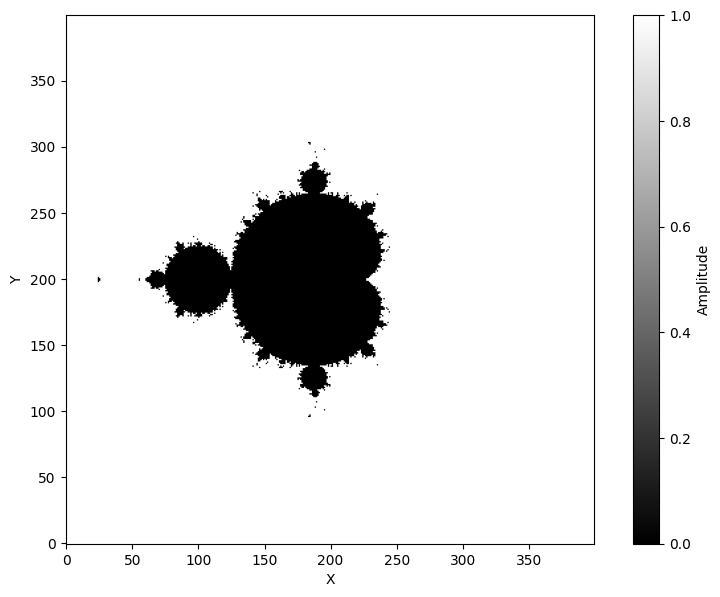

In [4]:
plt.figure(figsize=(10,7), dpi=100)
plt.imshow(U1.transpose(), cmap='gray', origin='lower')
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Amplitude")
plt.show()

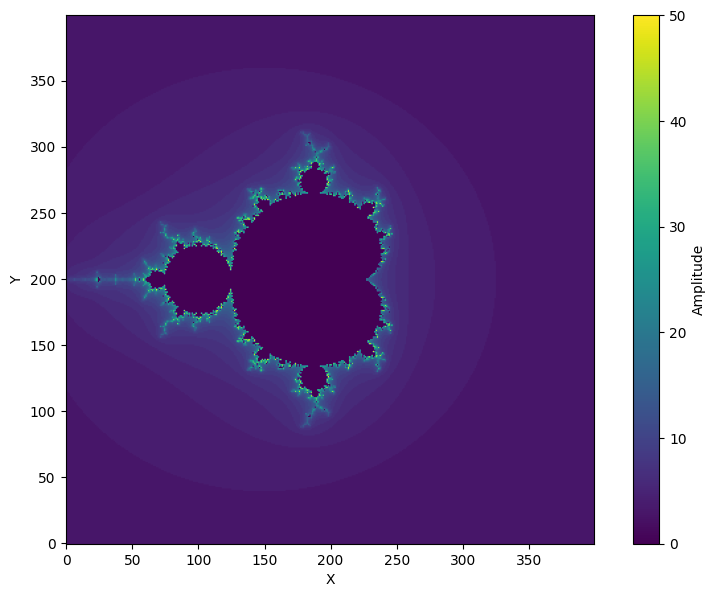

In [5]:
plt.figure(figsize=(10,7), dpi=100)
plt.imshow(U2.transpose(), origin='lower')
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Amplitude")
plt.show()

# Question 2

In [5]:
from scipy.integrate import solve_ivp

In [4]:
#Defining the system of differential equations given

def dot(t, pos, sig, r, b):
    """
    The system of differential equations (1), (2) and (3) from Question 2.
    
    """
    
    x,y,z = pos
    
    return -sig * (x - y), r*x - y - x*z, -b*z + x*y

In [6]:
#Constants and initial conditions

sig = 10
r = 28
b = 8/3

y0 = np.array([0,1,0])

t_eval = np.linspace(0,60, 6000)
t_span = [0, 60]

atol = [3e-12, 3e-12, 3e-12]
rtol = 3e-12

#Creating a function that will run the solve_ivp function with our specific conditions.

def solve_lorenz(y0):
    return solve_ivp(
        fun=lambda t,pos: dot(t, pos, sig, r, b),
        t_span = t_span,
        y0 = y0,
        t_eval = t_eval,
        atol = atol,
        rtol = rtol
    )

In [7]:
x_sol, y_sol, z_sol = solve_lorenz(y0).y

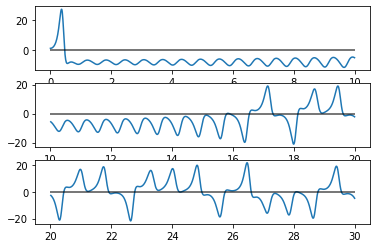

In [8]:
fig, ax = plt.subplots(3,1)

ax[0].plot(t_eval[:1000], y_sol[:1000])
ax[0].hlines(y=0, xmin=0, xmax=10, color='k', alpha=0.7)

ax[1].plot(t_eval[1001:2000], y_sol[1001:2000])
ax[1].hlines(y=0, xmin=10, xmax=20, color='k', alpha=0.7)

ax[2].plot(t_eval[2001:3000], y_sol[2001:3000])
ax[2].hlines(y=0, xmin=20, xmax=30, color='k', alpha =0.7)

plt.show()

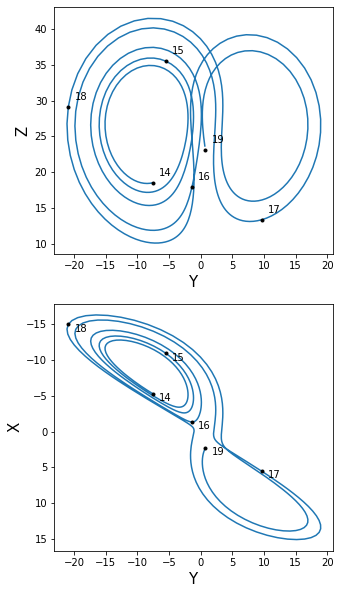

In [17]:
size = 15



fig, ax = plt.subplots(2,1, figsize=(5,10))

ax[0].plot(y_sol[1400:1900], z_sol[1400:1900])
ax[0].set_xlabel('Y', size=size)
ax[0].set_ylabel('Z', size=size)

for i in range(1400, 2000, 100):
    ax[0].plot(y_sol[i], z_sol[i], 'ko', ms=3)
    ax[0].text(y_sol[i]+1, z_sol[i]+1, '%i' %(i/100))


ax[1].plot(y_sol[1400:1900], x_sol[1400:1900])
ax[1].set_xlabel('Y', size=size)
ax[1].set_ylabel('X', size=size)
ax[1].invert_yaxis()

for i in range(1400, 2000, 100):
    ax[1].plot(y_sol[i], x_sol[i], 'ko', ms=3)
    ax[1].text(y_sol[i]+1, x_sol[i]+1, '%i' %(i/100))

plt.show()

In [ ]:
#Adding a pertubation to the given initial conditions.

y1 = y0 + np.array([0,1e-8,0])

x_sol1, y_sol1, z_sol1 = solve_lorenz(y1).y

In [ ]:
#Getting the distance at every instance between W_0 and W'_0.

W_dist = np.sqrt((x_sol - x_sol1)**2 +  (y_sol - y_sol1)**2 + (z_sol - z_sol1)**2)


In [ ]:
figure = plt.figure(figsize=(10,7))

plt.plot(t_eval, W_dist)
plt.yscale('log')

plt.show()